In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import json
from cleaning import *

In [3]:
data = pd.read_excel('./input/RawData_ComesF.xlsx',"Planilha2",index_col=False)

In [4]:
contatos = pd.read_excel('./input/RawData_ComesF.xlsx',"Contatos01",index_col=False)
contatos02 = pd.read_excel('./input/RawData_ComesF.xlsx',"Contatos02",index_col=False)

In [5]:
data = data.rename(columns={'enfant gardé chez assist. Mat.\nassistante maternelle ?': 'enfant gardé chez assist. Mat. assistante maternelle ?'})
data = data.rename(columns={'enfant  gardé maison/en famille ?': 'enfant  gardé maison en famille ?'})

contatos = contatos.rename(columns={ 'jour1mois1' : 'dia/mês'})
contatos = contatos.rename(columns = {'Nombre de contacts saisis JOUR 1' : 'Número de Contatos'})

contatos02 = contatos02.rename(columns={ 'jour2mois2' : 'dia/mês'})
contatos02 = contatos02.rename(columns = {'Nombre de contacts saisis JOUR 2' : 'Número de Contatos'})

In [6]:
data.head()

,vague,num questio,CONTRÔLE Num Questio versus recrut Tel,Type de questionnaire,Age du sujet de l'enquête,Sexe du sujet de l'enquête,Lien du répondant pour l'enfant <15 ans Sujet de l'enquête,Age du répondant pour l'enfant <15 ans Sujet de l'enquête,Sexe du répondant pour l'enfant <15 ans Sujet de l'enquête,Nombre de personnes au foyer,...,profession qui entraîne beaucoup de contacts ?,nombre de contacts en milieu pro,tranche(s) d'âge des contacts en milieu pro,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,A ou non plus de 20 contacts professionnels,Nombre d'étudiants dans la classe,Etudiant qui mange à la cantine ?
0,2,15218,1,1,38,2,NaN,NaN,NaN,2,...,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
1,2,3996,1,0,0,2,1.0,29.0,1.0,4,...,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
2,2,14409,1,1,18,2,NaN,NaN,NaN,4,...,NaN,NaN,0,0,0,0,0,NaN,3.0,3.0
3,2,952,1,1,74,1,NaN,NaN,NaN,2,...,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
4,2,12382,1,1,71,1,NaN,NaN,NaN,1,...,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN


In [7]:
df = change_age(data)
df = change_mode(df)
df = change_traches(df)
df = change_column(df)
df.head()

,onda,pergunta de número,CONTROL Num Questionio versus recrutar Tel,Tipo de questionário,Q1_cQ1,Q2,cQ2,cQ1,cQ6,Q_,...,cQ18b,Q8,Q8a,Q8c,Q9,Q10,Q3_cQ7,Q5a_cQ4a,Q5b_cQ4b,Q8b
0,2,15218,1,1,38,2,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,"[38.0, 68.0]","[0, 1, 0]","[0, 0, 0]","[0, 0, 0, 0, 0]"
1,2,3996,1,0,0,2,1.0,29.0,1.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,"[29.0, 0.0, 3.0, 33.0]","[1, 0, 1]","[1, 0, 1]","[0, 0, 0, 0, 0]"
2,2,14409,1,1,18,2,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,3.0,3.0,"[18.0, 49.0, 48.0, 16.0]","[1, 0, 0]","[1, 0, 0]","[0, 0, 0, 0, 0]"
3,2,952,1,1,74,1,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,"[74.0, 81.0]","[1, 0, 1]","[1, 0, 1]","[0, 0, 0, 0, 0]"
4,2,12382,1,1,71,1,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[71.0],"[1, 0, 1]","[1, 0, 0]","[0, 0, 0, 0, 0]"


In [8]:
criancas = df[df["Tipo de questionário"] == 0].reset_index()
adultos = df[df["Tipo de questionário"] == 1].reset_index()
adultos = remove_adultos(adultos,0)
criancas = remove_adultos(criancas,1)

In [9]:
adultos.head()

,index,onda,pergunta de número,Q1_cQ1,Q2,Q_,Q_1,Q4_cQ8,Q6_cQ9,Q7_cQ10,Q8,Q8a,Q8c,Q9,Q10,Q3_cQ7,Q5a_cQ4a,Q5b_cQ4b,Q8b
0,0,2,15218,38,2,2,59,3.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,"[38.0, 68.0]","[0, 1, 0]","[0, 0, 0]","[0, 0, 0, 0, 0]"
1,2,2,14409,18,2,4,8,2.0,7.0,NaN,NaN,NaN,NaN,3.0,3.0,"[18.0, 49.0, 48.0, 16.0]","[1, 0, 0]","[1, 0, 0]","[0, 0, 0, 0, 0]"
2,3,2,952,74,1,2,49,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,"[74.0, 81.0]","[1, 0, 1]","[1, 0, 1]","[0, 0, 0, 0, 0]"
3,4,2,12382,71,1,1,37,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,[71.0],"[1, 0, 1]","[1, 0, 0]","[0, 0, 0, 0, 0]"
4,5,2,9631,67,2,2,37,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,"[67.0, 65.0]","[1, 0, 0]","[1, 0, 0]","[0, 0, 0, 0, 0]"


In [10]:
criancas.head()

,index,onda,pergunta de número,Q1_cQ1,cQ2,cQ1,cQ6,Q4_cQ8,Q6_cQ9,Q7_cQ10,...,cQ14a,cQ15,cQ16,cQ17,cQ18,cQ18a,cQ18b,Q3_cQ7,Q5a_cQ4a,Q5b_cQ4b
0,1,2,3996,0,1.0,29.0,1.0,5.0,5.0,10.0,...,NaN,4.0,NaN,NaN,2.0,NaN,NaN,"[29.0, 0.0, 3.0, 33.0]","[1, 0, 1]","[1, 0, 1]"
1,6,2,17843,4,1.0,34.0,1.0,2.0,5.0,11.0,...,NaN,NaN,2.0,3.0,1.0,1.0,1.0,"[34.0, 4.0, 36.0, 10.0, 8.0, 1.0]","[1, 1, 0]","[1, 0, 0]"
2,8,2,9830,9,1.0,43.0,1.0,6.0,5.0,10.0,...,NaN,NaN,1.0,3.0,1.0,1.0,4.0,"[43.0, 9.0, 43.0, 15.0, 13.0]","[1, 0, 1]","[1, 0, 1]"
3,18,2,4006,2,1.0,31.0,1.0,6.0,5.0,10.0,...,NaN,9.0,NaN,NaN,2.0,NaN,NaN,"[31.0, 2.0, 34.0]","[1, 0, 1]","[1, 0, 1]"
4,19,2,11515,12,1.0,45.0,1.0,3.0,5.0,7.0,...,NaN,NaN,2.0,3.0,2.0,NaN,NaN,"[45.0, 12.0, 45.0, 15.0]","[0, 1, 1]","[1, 0, 0]"


In [11]:
a = [profissional(i,adultos) for i in adultos.index]
c = [school(i,criancas) for i in criancas.index]
writer = pd.ExcelWriter('./dados/output.xlsx')
create_children(criancas,c,writer)
create_adult(adultos,a,writer)
writer.save()

/tmp/ipykernel_24277/2246513319.py:6: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


In [12]:
erro = [i for i in df.columns[15:28] if 9. in df[i].unique()]
writer = pd.ExcelWriter('./dados/erros.xlsx')
cont = 0
for i in erro:
    df[df[i] == 9].to_excel(writer, sheet_name=f'{i}')
writer.save()

/tmp/ipykernel_24277/59015791.py:6: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


In [13]:
adultos["index"] = [i for i in range(adultos.index[-1]+1)]
criancas["index"] = ['c'+str(i) for i in range(criancas.index[-1]+1)]

In [14]:
writer = pd.ExcelWriter('./dados/questionario.xlsx')
adultos.to_excel(writer, sheet_name='adultos',index= False)
criancas.to_excel(writer, sheet_name='criancas',index= False)
writer.save()

/tmp/ipykernel_24277/3588099771.py:4: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


In [15]:
contatos.head()

,dia/mês,CONTRÔLE validation jour1mois1 en période vague 1 ou 2,joursemaine1,Vacances jour1mois1,Número de Contatos,age min,age max,age moyen,sexe,lieux,...,lieux .39,lieux 86,lieux 87,lieux 88,lieux 89,lieux 90,lieux 91,freq .39,peau .39,durée .39
0,105.0,1.0,2.0,1,2,68.0,NaN,68.0,1.0,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2004.0,1.0,5.0,1,6,29.0,NaN,29.0,1.0,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,205.0,1.0,3.0,1,11,49.0,NaN,49.0,1.0,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,2904.0,1.0,7.0,2,6,81.0,NaN,81.0,2.0,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2004.0,1.0,5.0,2,3,73.0,NaN,73.0,2.0,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [16]:
contacts = get_json(contatos,df)
contacts02 = get_json(contatos02,df)

In [17]:
idades = []
c = 0
a = 0
for i in df['Q1_cQ1'].values:
    if(i>15):
        idades.append(str(a))
        a += 1
    else:
        idades.append('c' + str(c))
        c += 1

In [18]:
import math 
design1 = []
design2 = []
for i,j in zip(contatos02['dia/mês'].values,idades):
    if(not math.isnan(i)):
        mes = int(str(int(i))[-2:])
        if((mes==2)|(mes==3)):
            design1.append(j)
        if((mes==4) | (mes==5)):
            design2.append(j)
for i,j in zip(contatos['dia/mês'].values,idades):
    if(not math.isnan(i)):
        mes = int(str(int(i))[-2:])
        if((mes==2)|(mes==3)):
            if(j not in design1):
                design1.append(j)
        if((mes==4) | (mes==5)):
            if(j not in design2):
                design2.append(j)
        #print(mes)
np.savetxt('./dados/design1.txt',design1,fmt='%s')
np.savetxt('./dados/design2.txt',design2,fmt='%s')

In [19]:
with open('./dados/contatos_dia1.json', 'w') as f:
    json.dump(contacts, f)
with open('./dados/contatos_dia2.json', 'w') as f:
    json.dump(contacts02, f)

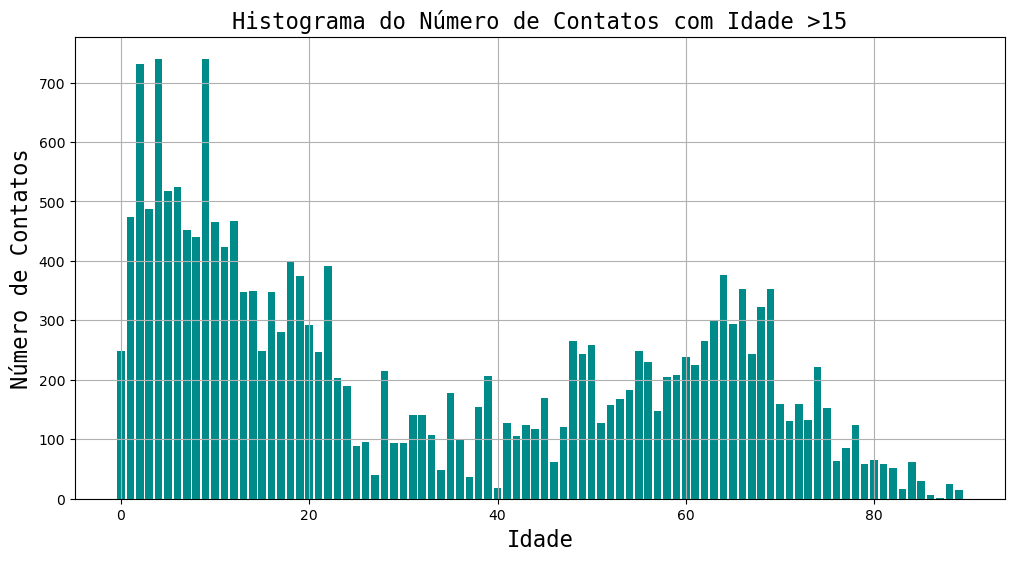

In [20]:
plot_contatos_idade(
    contacts,
    criancas,
    adultos,
    'idade_contatos'
    ,'Histograma do Número de Contatos com Idade >15'
)

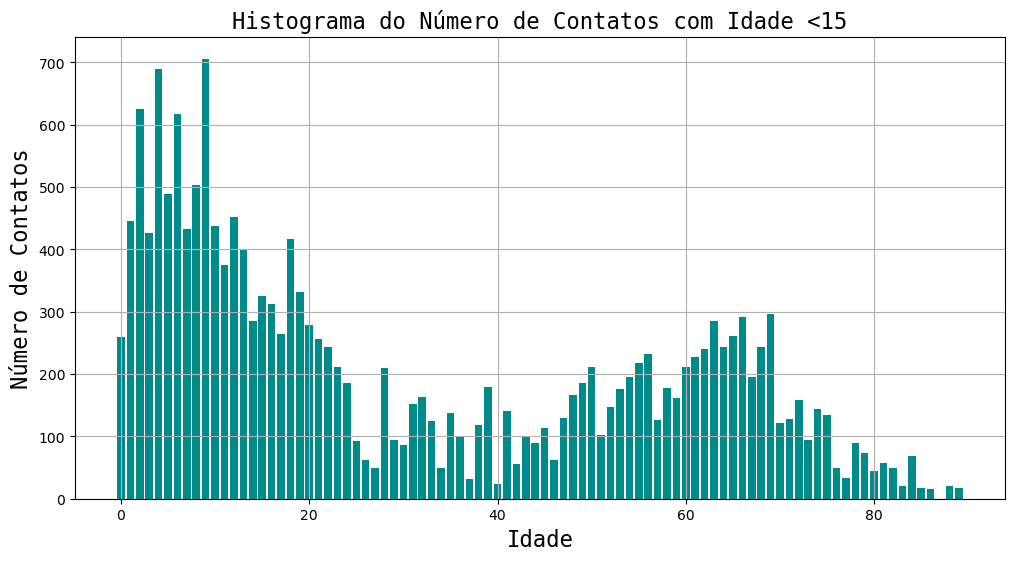

In [21]:
plot_contatos_idade(
    contacts02,
    criancas,
    adultos,
    'idade_contatos02',
    'Histograma do Número de Contatos com Idade <15'
)

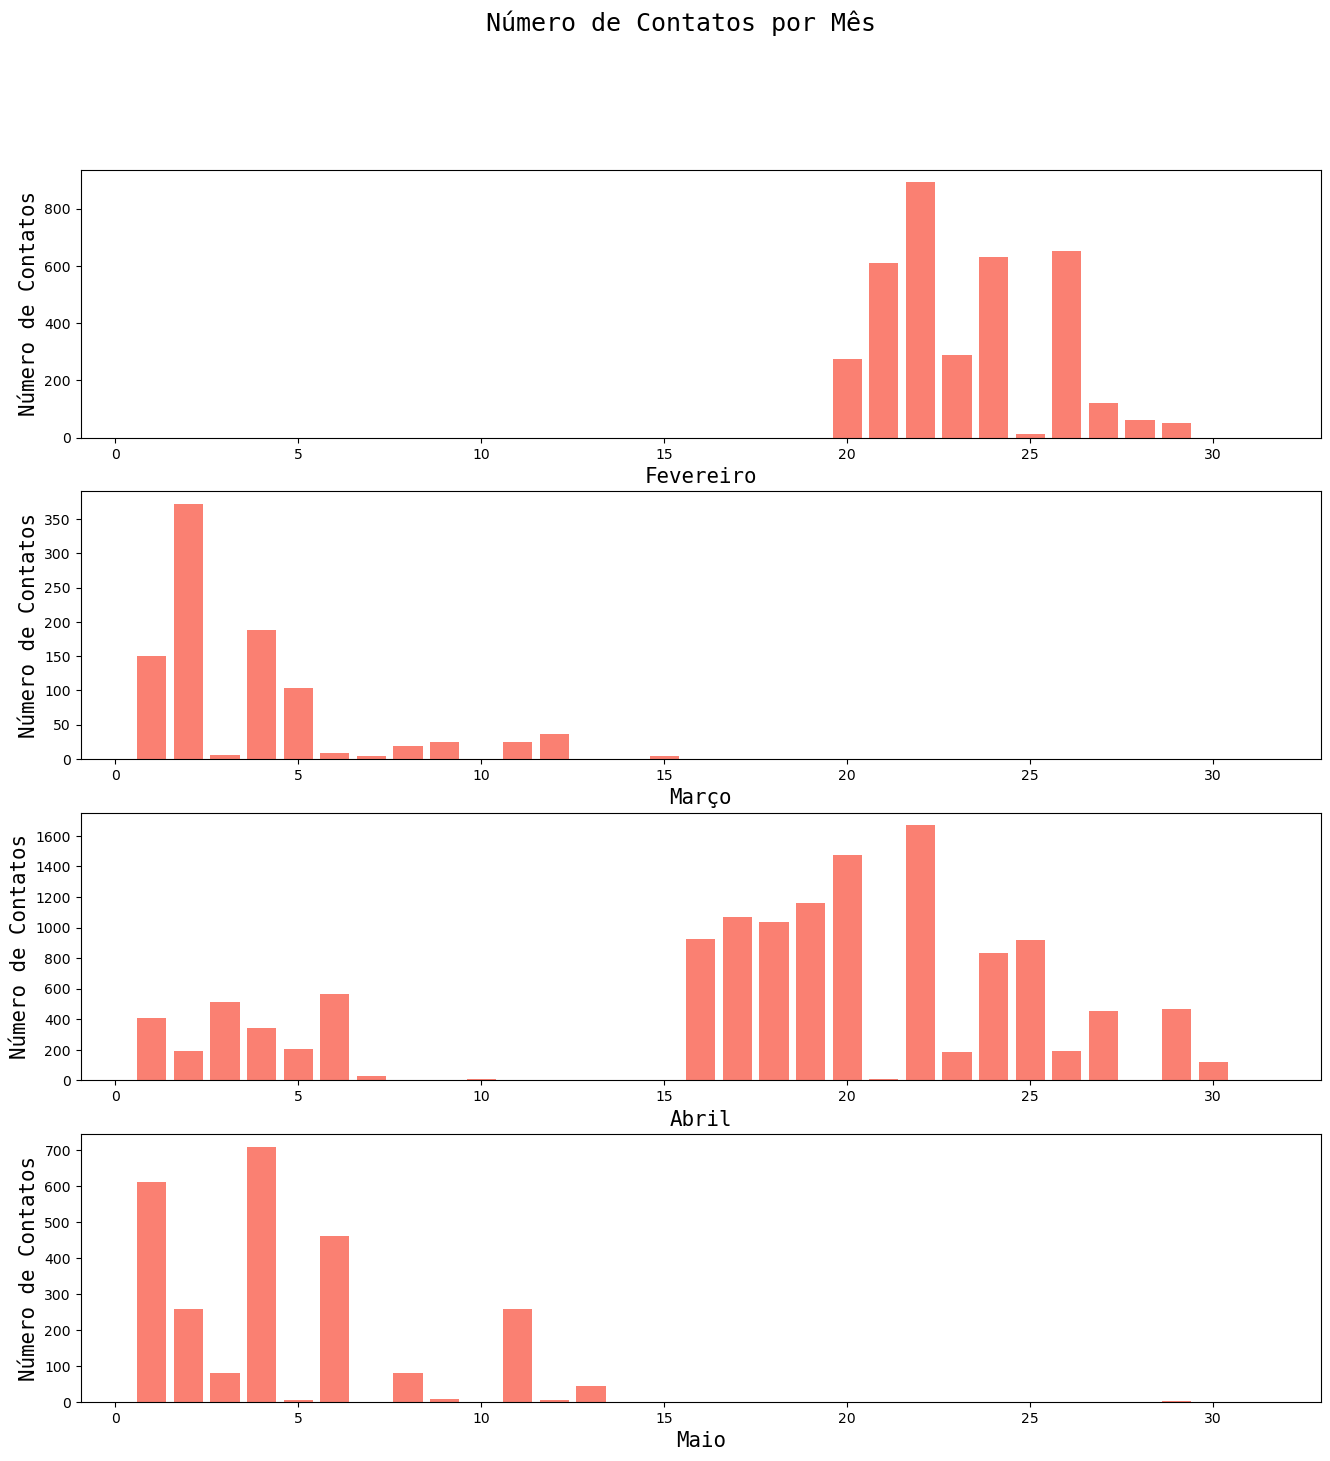

In [22]:
plot_mes(contatos,'contatos_mes')

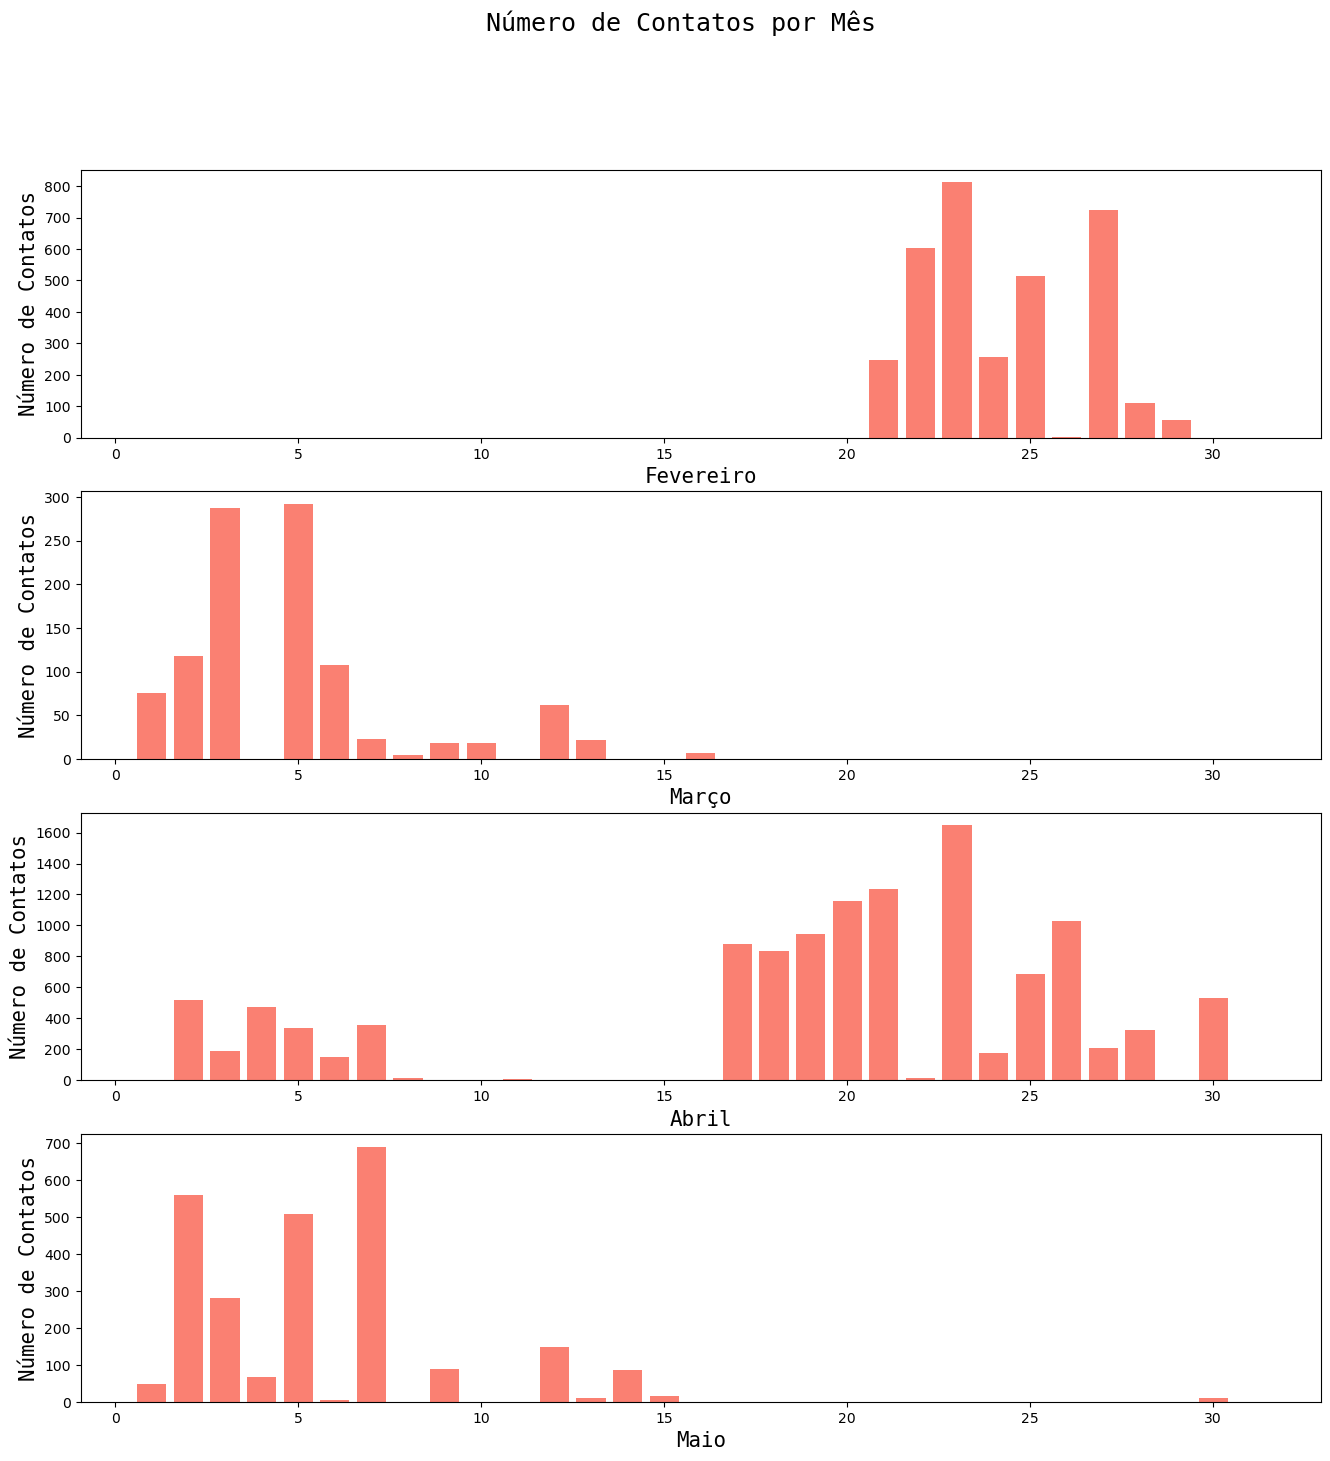

In [23]:
plot_mes(contatos02,'contatos_mes02')

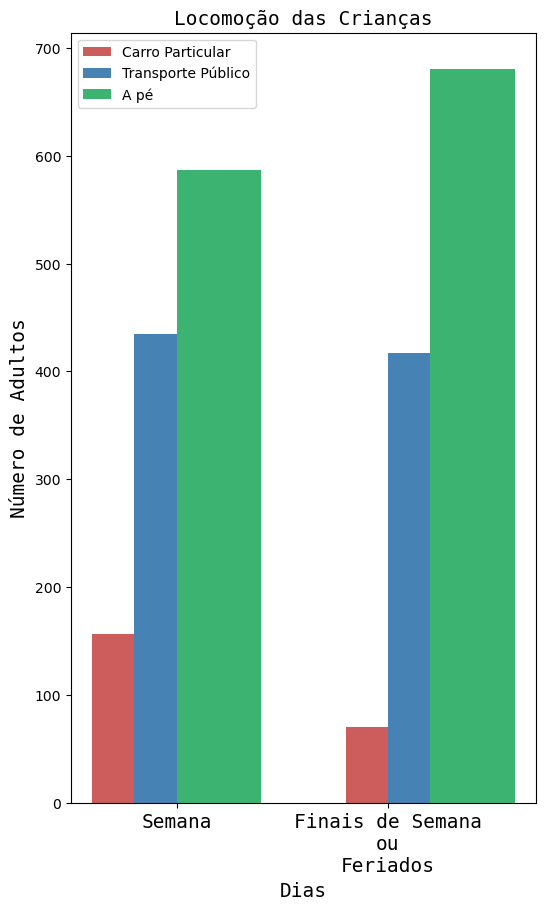

In [24]:
locomotion_adultos(
    criancas,
    'Locomoção das Crianças',
    'locomotion_criancas'
)

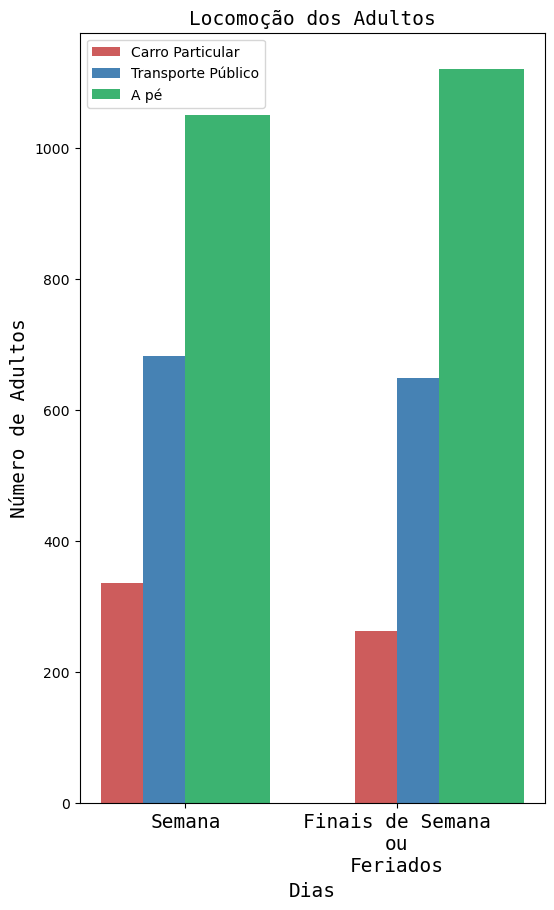

In [25]:
locomotion_adultos(
    adultos,
    'Locomoção dos Adultos',
    'locomotion_adultos'
)

In [26]:
print(np.sum(contatos['Número de Contatos'].values))
print(np.sum(contatos02['Número de Contatos'].values))

19844
18592


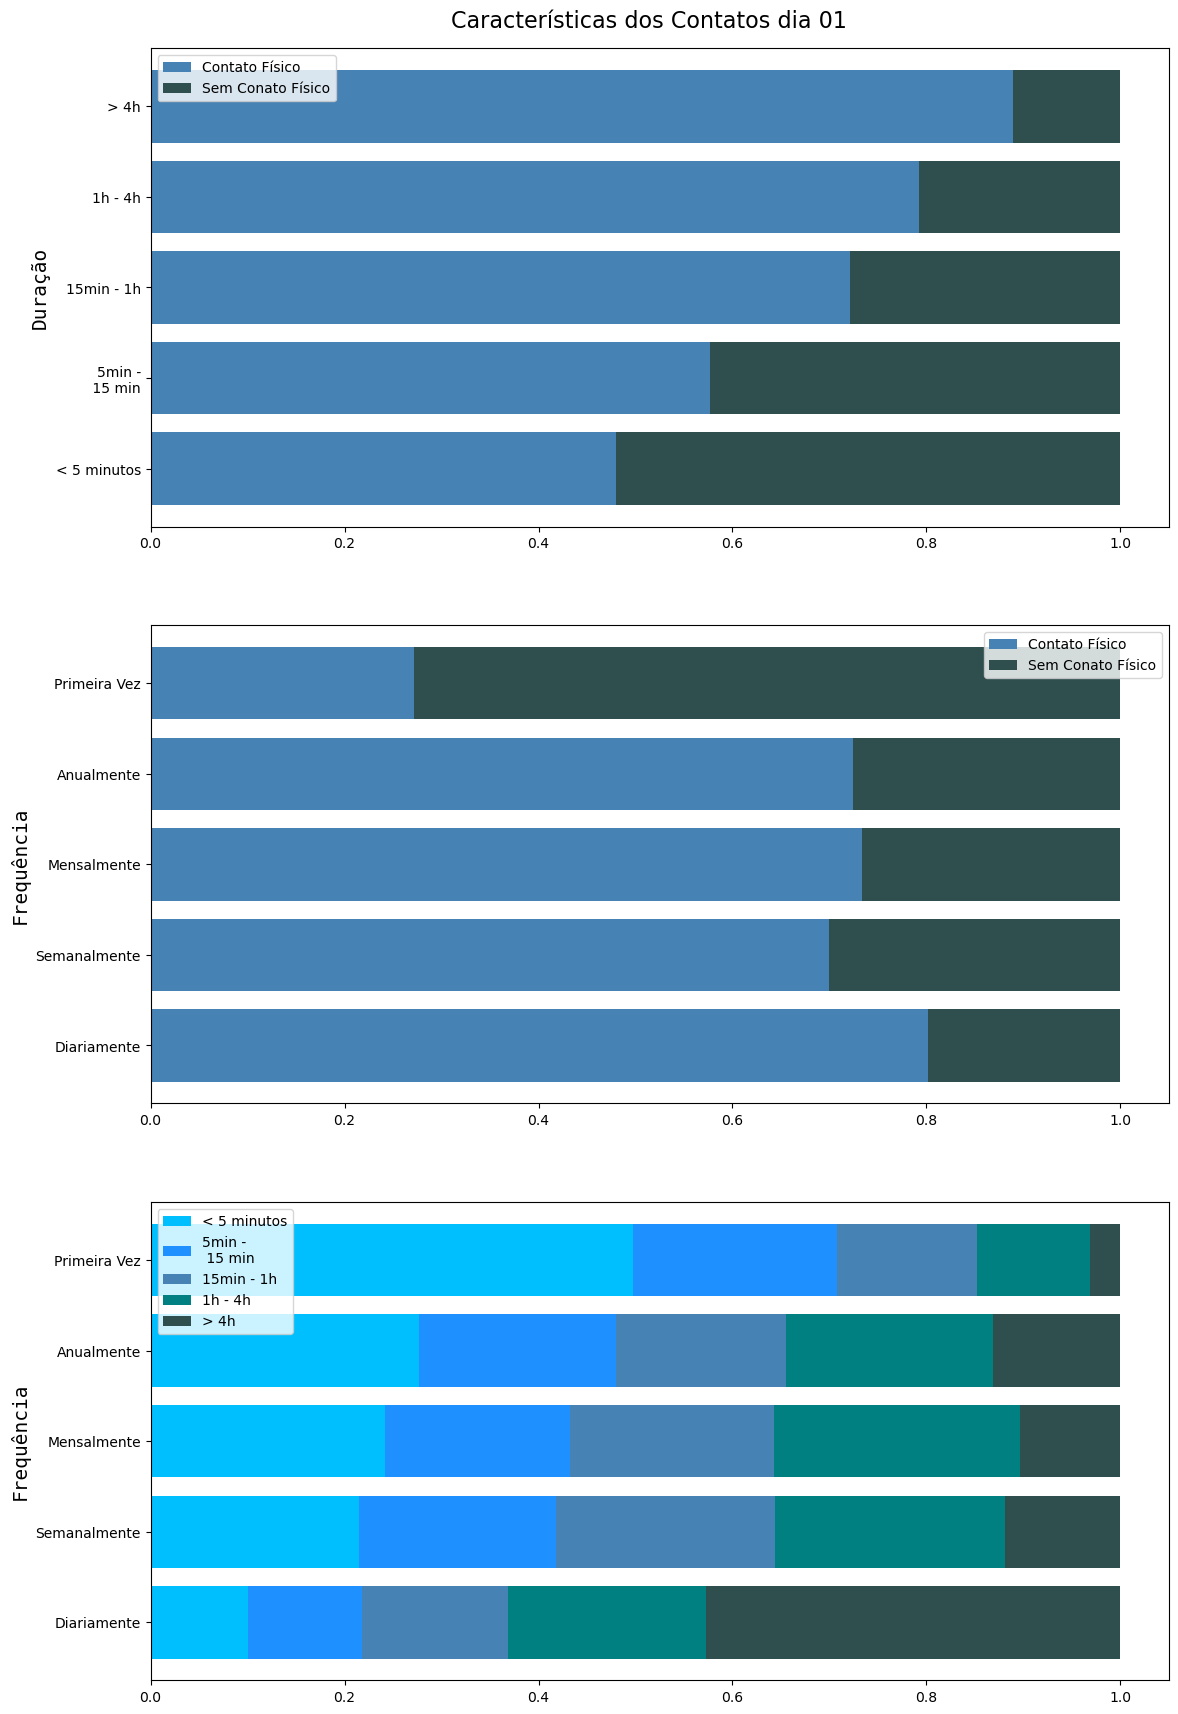

In [27]:
multiple_stacked_bar(
    contacts,
    'Características dos Contatos dia 01'
)

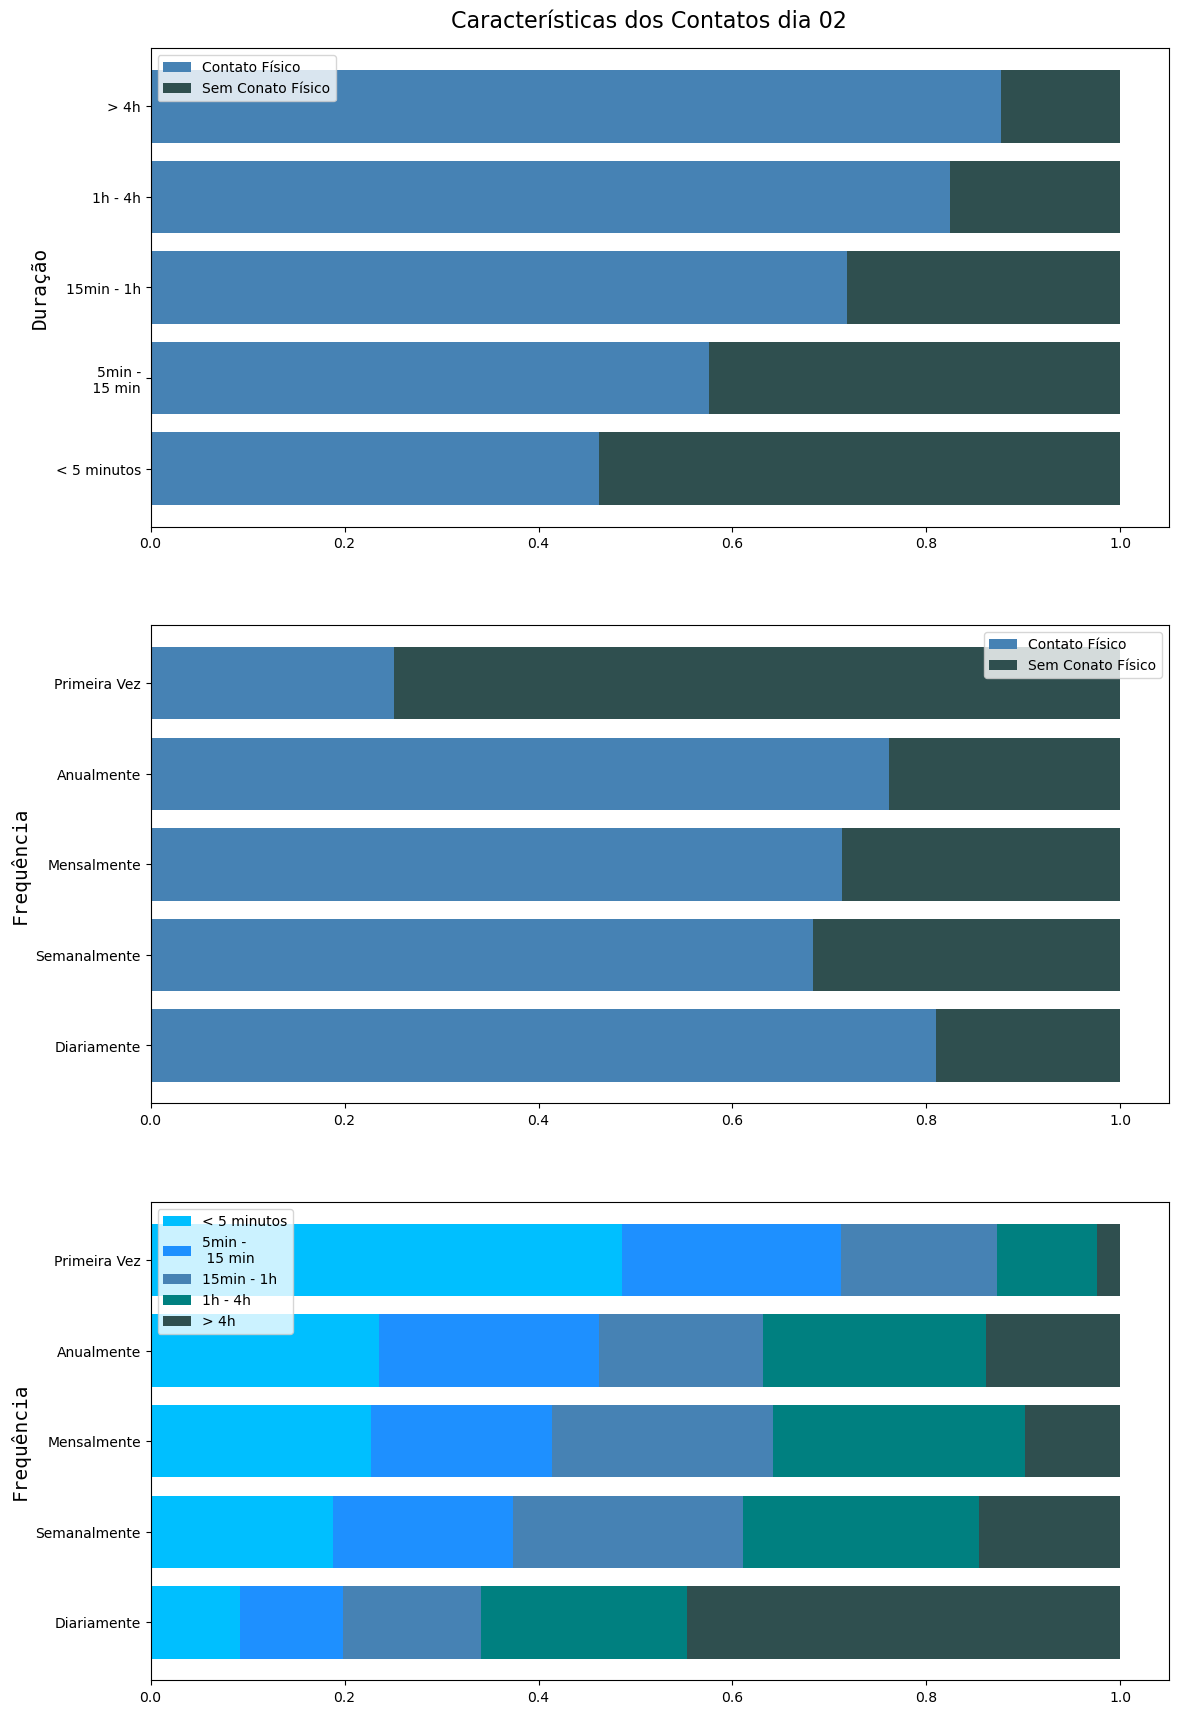

In [28]:
multiple_stacked_bar(
    contacts02,
    'Características dos Contatos dia 02'
)

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


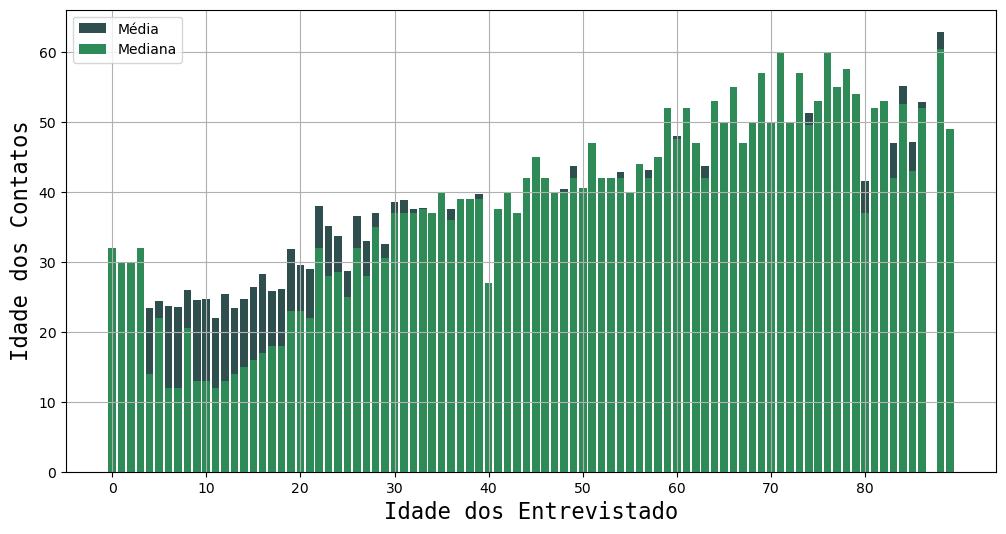

In [29]:
conncection_idade(contacts02,criancas,adultos)

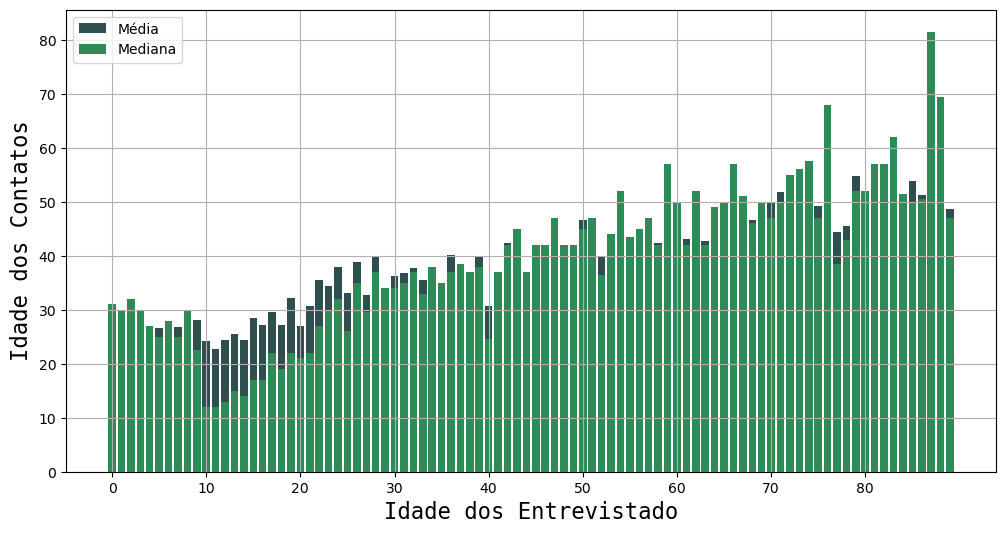

In [30]:
conncection_idade(contacts,criancas,adultos)

In [31]:
df = pd.read_csv('./input/INFLUD20-14-11-2022.csv',delimiter = ';',usecols = ['NU_IDADE_N','EVOLUCAO','CLASSI_FIN']) 

In [32]:
df = df[df['CLASSI_FIN'] == 5]
df

,NU_IDADE_N,CLASSI_FIN,EVOLUCAO
7,61,5.0,1.0
10,92,5.0,2.0
12,60,5.0,2.0
35,54,5.0,2.0
37,68,5.0,2.0
...,...,...,...
1201053,60,5.0,1.0
1201054,54,5.0,1.0
1201055,78,5.0,1.0
1201056,71,5.0,NaN


In [33]:
hist = [
    [0,0],
    [1,5],
    [6,19],
]
[hist.append([i,i+9]) for i in range(20,100,10)]
hist[-1] = [90,100000]
label = [f'Idade < 1' if i[0]==0 else f'{i[0]} <= Idade <= {i[1]} ' for i in hist]

In [34]:
# Número de mortos dividido por Número de Infectados
Nmortos = {}
for i,j in zip(label,hist):
    if(j[0]!=0):
        Nmortos[i] = df[(df['NU_IDADE_N']>=j[0]) & (df['NU_IDADE_N']<=j[1]) & (df['EVOLUCAO']==2)].shape[0]/df[(df['NU_IDADE_N']>=j[0]) & (df['NU_IDADE_N']<=j[1])].shape[0]
    else:
        Nmortos[i] = df[(df['NU_IDADE_N'] == j[0]) & (df['EVOLUCAO']==2)].shape[0]/df[df['NU_IDADE_N'] == j[0]].shape[0]

In [35]:
with open('./dados/mortalidade.json', 'w') as f:
    json.dump(Nmortos, f)

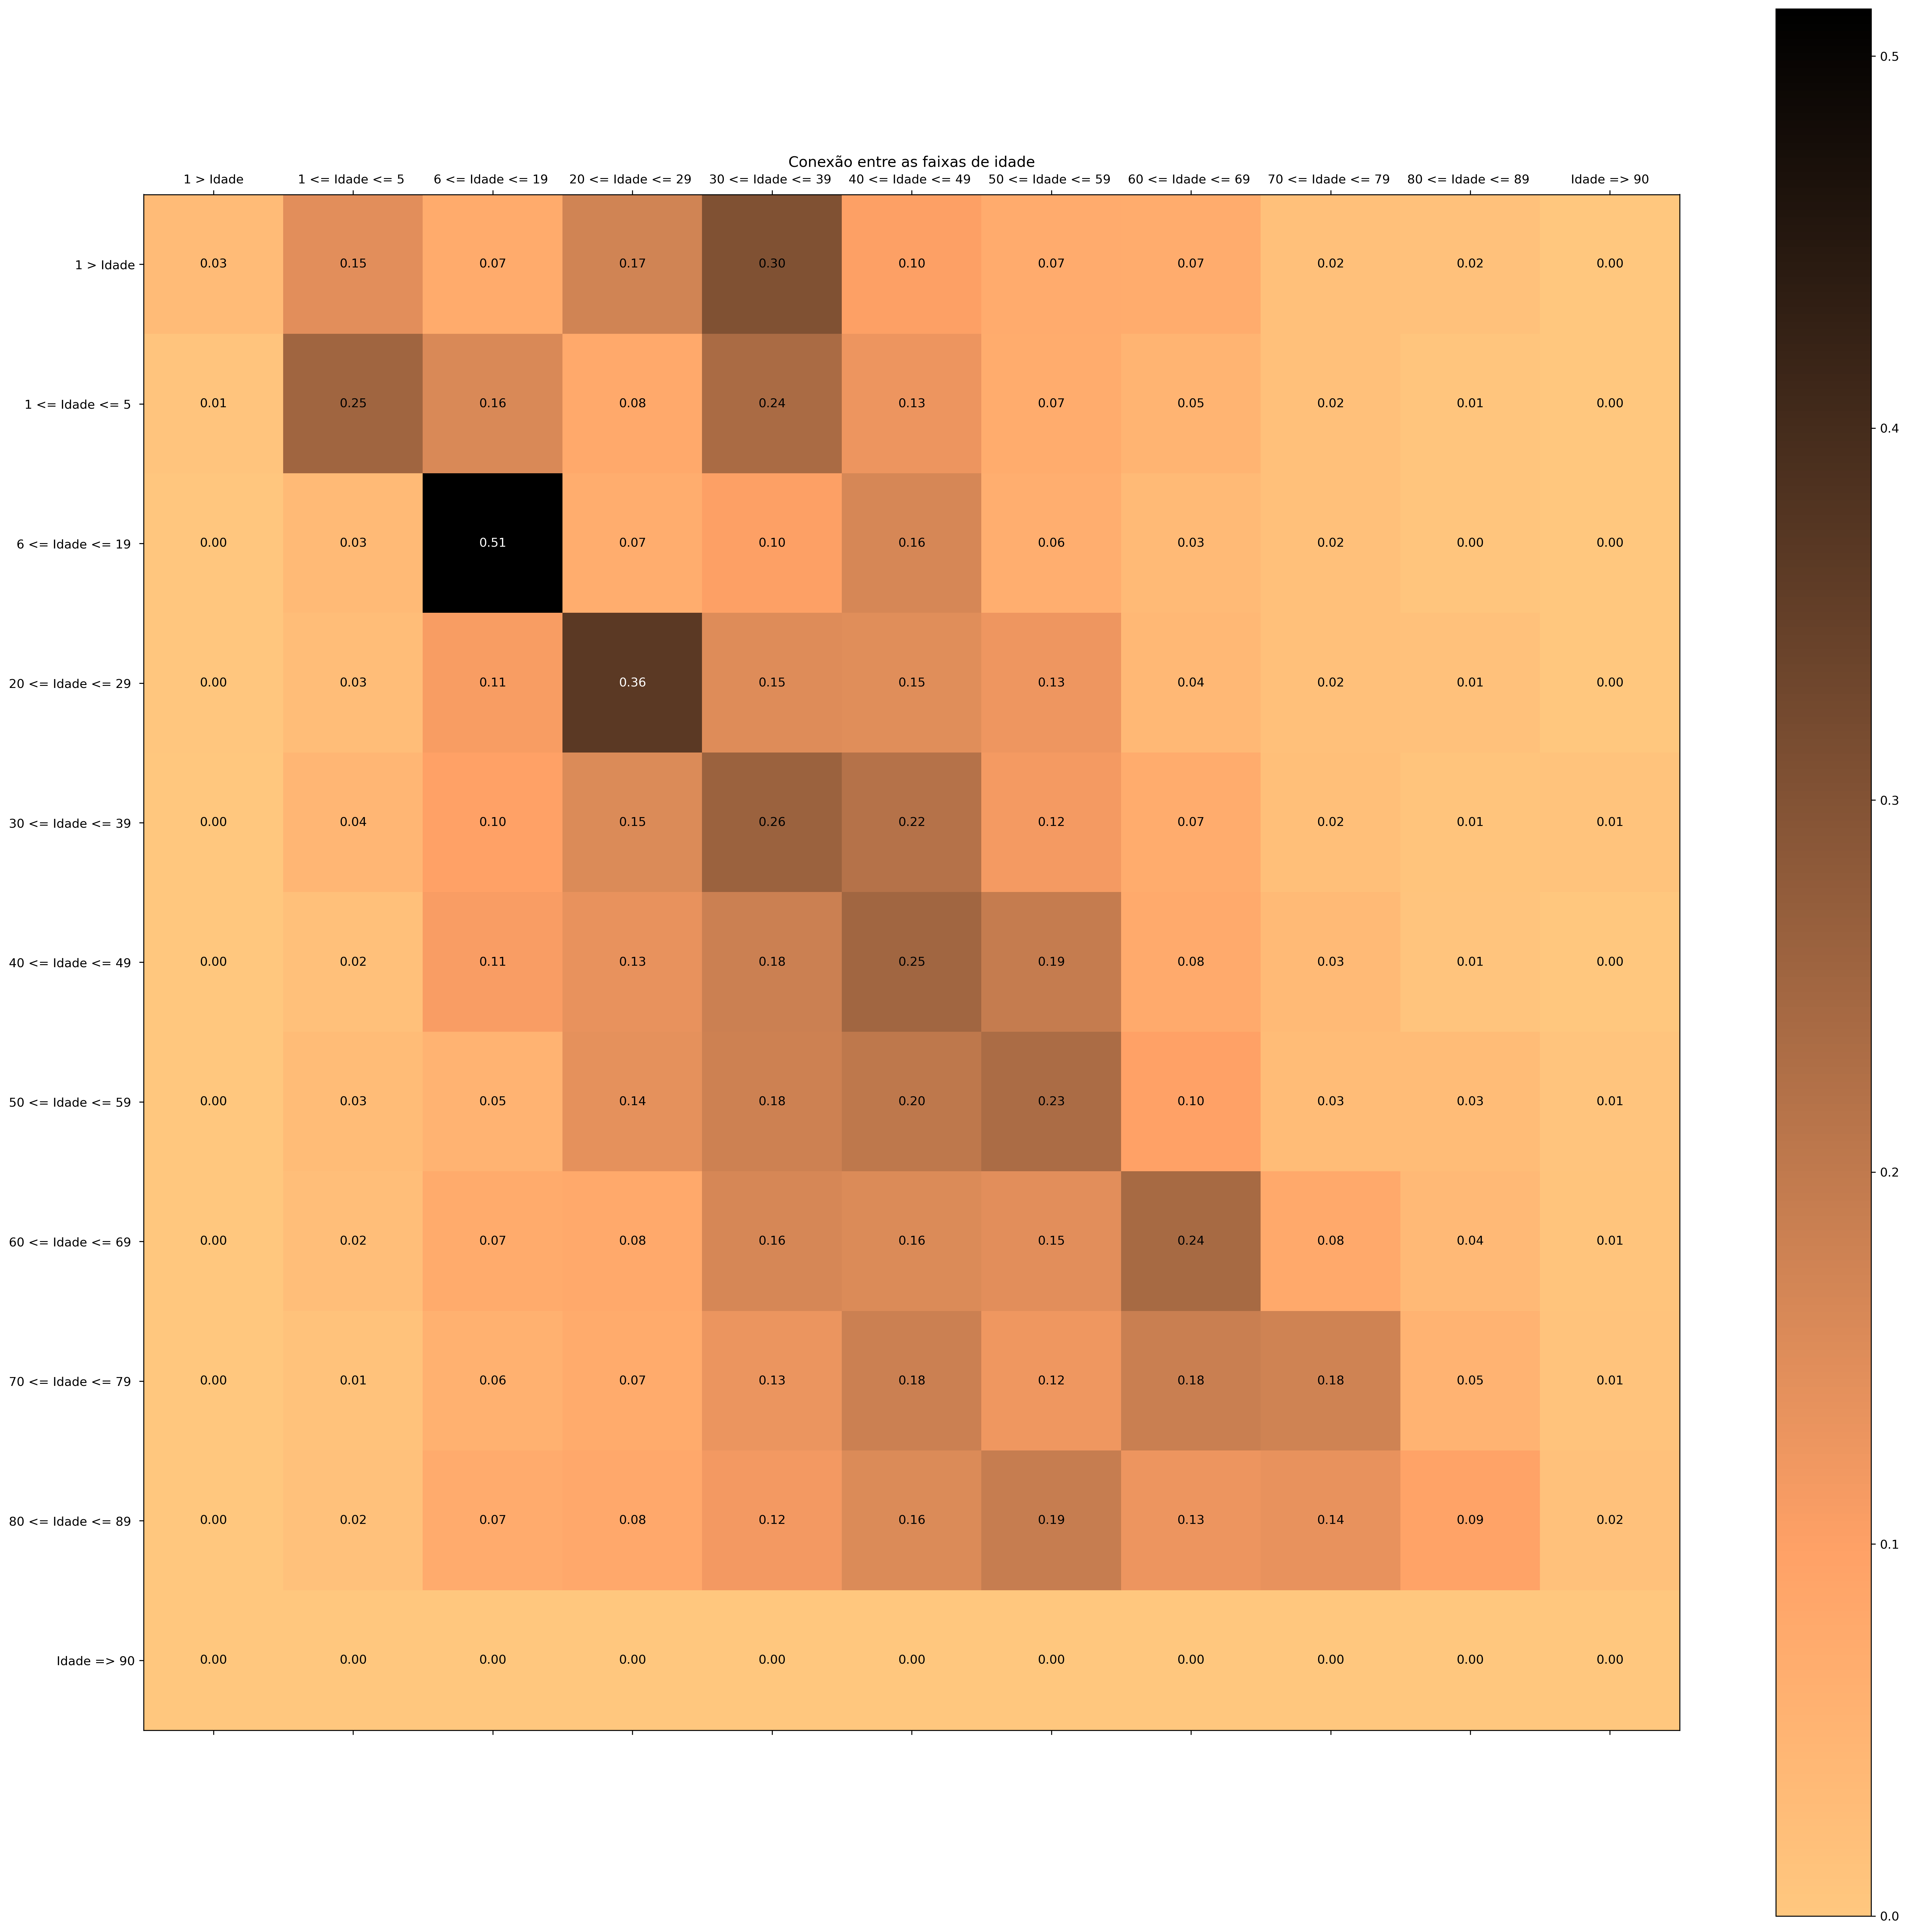

In [44]:
A = adj(adultos,criancas,contacts,contacts02,Nmortos)

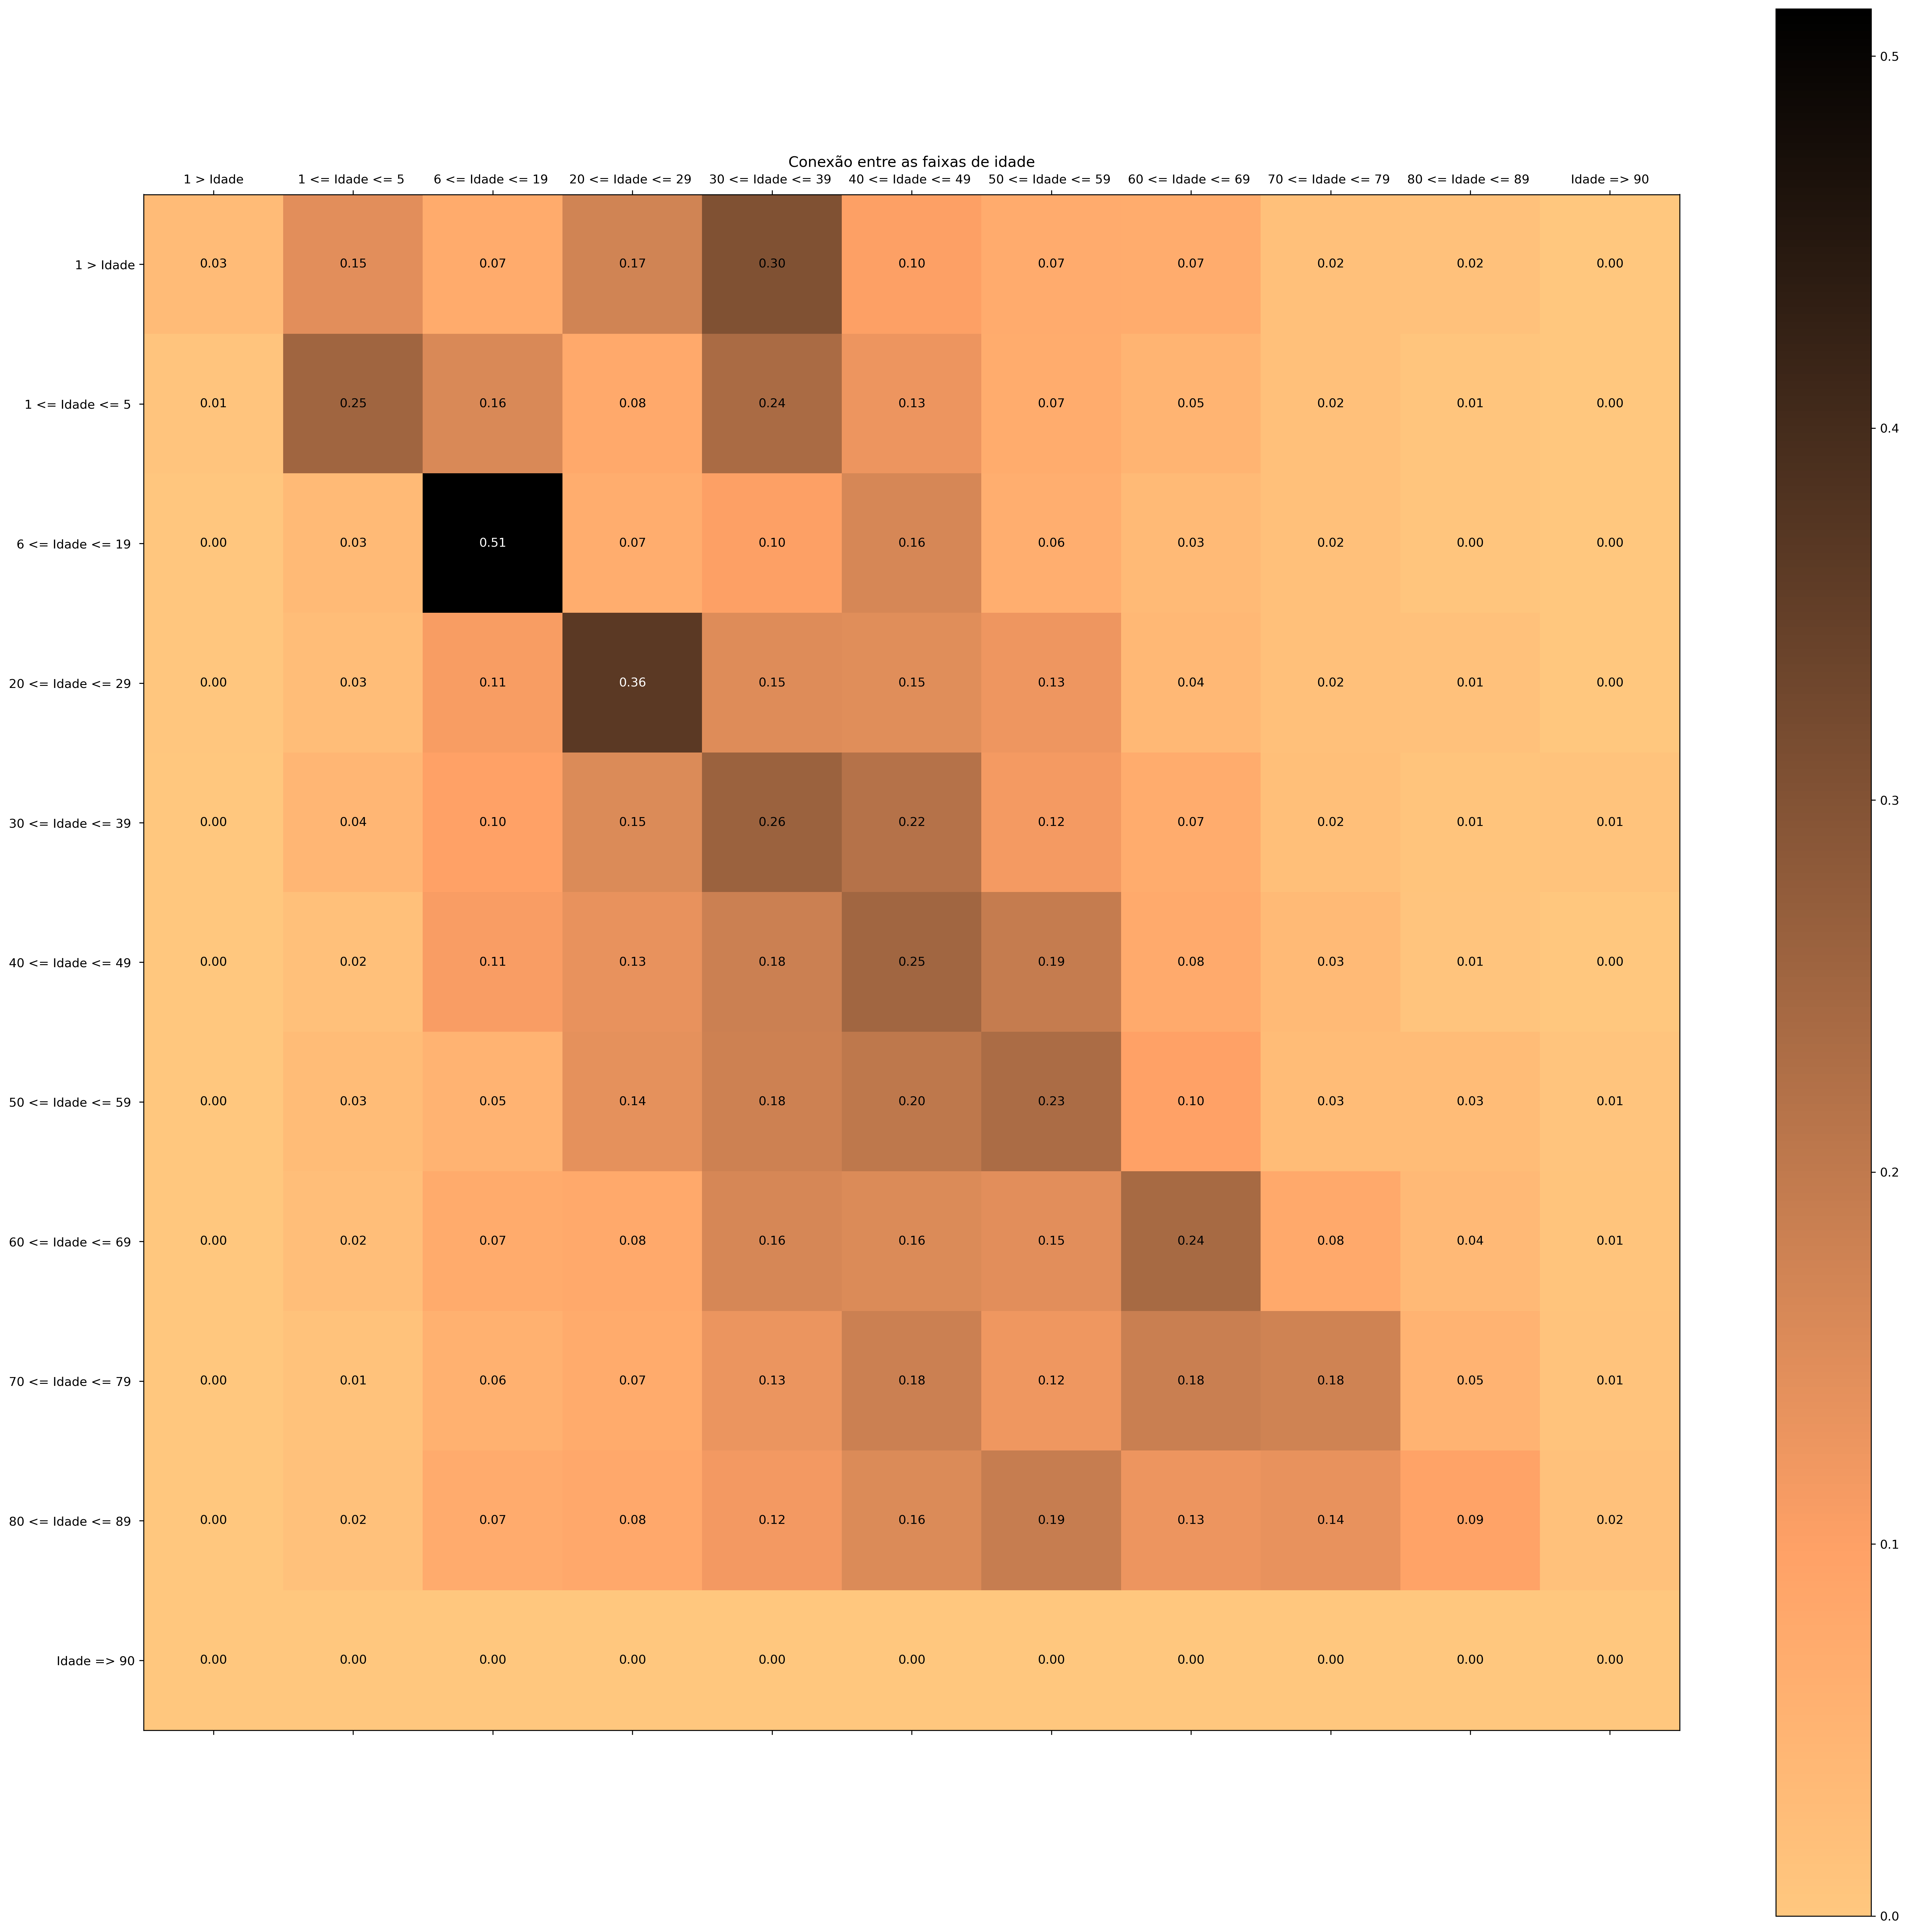

In [148]:
xaxis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

array([  508.,  5625., 11717.,  3542.,  2349.,  2416.,  3678.,  5467.,
        2314.,   642.,     0.])